In [46]:
import pandas as pd
import docx
import matplotlib.pyplot as plt
import numpy as np

## 1-Gross domestic product per capita

# NO DATASET FOR COLOMBIA

In [47]:
root = '/home/dila-isi/PycharmProjects/homealarms/FAO/FOOD ACCESS/'
file = '/Gross domestic product per capita.csv'

#colombia = pd.read_csv(root + 'Colombia' + file)
ecuador = pd.read_csv(root + 'Ecuador' + file)
georgia = pd.read_csv(root + 'Georgia' + file)
peru = pd.read_csv(root + 'Peru' + file)
vietnam = pd.read_csv(root + 'Vietnam' + file)

In [48]:
#colombia.set_index('Year', inplace=True)
ecuador.set_index('Year Code', inplace=True)
georgia.set_index('Year Code', inplace=True)
peru.set_index('Year Code', inplace=True)
vietnam.set_index('Year Code', inplace=True)
#colombia = colombia.tail(9)
ecuador = ecuador.tail(10)
georgia = georgia.tail(10)
peru = peru.tail(10)
vietnam = vietnam.tail(10)

In [49]:
dfSummary=pd.DataFrame({"Country":['Ecuador', 'Georgia','Peru', 'Vietnam']})
dfList=[ecuador, georgia, peru,vietnam ]

min,max,mean,std = [],[],[],[]
for df in dfList:
    min.append("%.2f" % df['Value'].min())
    max.append("%.2f" % df['Value'].max())
    mean.append("%.2f" % df['Value'].mean())
    std.append("%.2f" % df['Value'].std())

dfSummary['Mean']=mean
dfSummary['S.D.']=std
dfSummary['Min.']=min
dfSummary['Max.']=max

In [50]:
dfSummary.loc[4]=['Colombia',None,None,None,None]

In [51]:
dfSummary

,Country,Mean,S.D.,Min.,Max.
0,Ecuador,11426.63,552.35,10325.00,12078.50
1,Georgia,13312.97,1380.18,11295.80,15471.70
2,Peru,12137.54,604.10,11176.10,12858.30
3,Vietnam,8781.39,1326.81,6911.70,10516.20
4,Colombia,None,None,None,None


In [52]:
df = dfSummary
# Initialise the Word document
doc = docx.Document()
# Initialise the table
t = doc.add_table(rows=1, cols=df.shape[1])
# Add borders
t.style = 'TableGrid'
# Add the column headings
for j in range(df.shape[1]):
    t.cell(0, j).text = df.columns[j]
# Add the body of the data frame
for i in range(df.shape[0]):
    row = t.add_row()
    for j in range(df.shape[1]):
        cell = df.iat[i, j]
        row.cells[j].text = str(cell)
# Save the Word doc
doc.save('Gross domestic product per capita.docx')

/home/dila-isi/.conda/envs/homealarms/lib/python3.10/site-packages/docx/styles/styles.py:139: UserWarning: style lookup by style_id is deprecated. Use style name as key instead.
  return self._get_style_id_from_style(self[style_name], style_type)


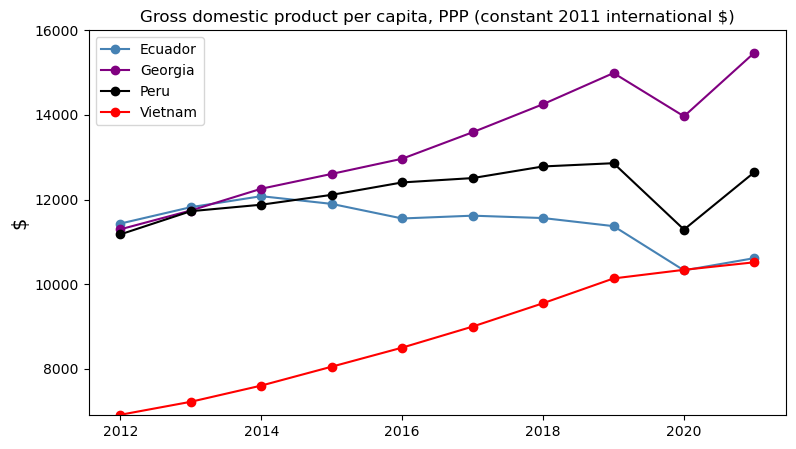

In [55]:
plt.subplots(figsize=(9, 5))
#plt.plot(0, label='Colombia', color='green', marker='o')
plt.plot(ecuador['Value'], label='Ecuador', color='steelblue', marker='o')
plt.plot(georgia['Value'], label='Georgia', color='purple', marker='o')
plt.plot(peru['Value'], label='Peru', color='black', marker='o')
plt.plot(vietnam['Value'], label='Vietnam', color='red', marker='o')
plt.title('Gross domestic product per capita, PPP (constant 2011 international $)', fontsize=12)
plt.legend(title='Country')
plt.ylim(6900,16000)
plt.ylabel('$', fontsize=14)
#plt.figure(figsize=(15,100))


#plt.plot(range(10), linestyle='--', marker='o', color='b', label='line with marker')
plt.legend()